## Observations and Insights

My observations:

1) The correlation between weight and tumor volume is significant at .84, showing that obese subjects are more at risk to life threatening tumors

2) The number of male and female subjects is almost 50-50, which means that the sex of the subject does not appear to be meaningful to the results.

3) Capomulin and Ramicane had the most successful results of the drugs, with the lowest ending tumor volumes. Based on the single subject graph, it appears there is a point of diminishing returns around 35 days that would suggest further study is needed to check into possible side ffects.
    
    

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets


from scipy.stats import linregress

%matplotlib notebook

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data_df = mouse_metadata.merge(study_results, on='Mouse ID', how = 'left')

#display header and number of entries
study_data_df.head(25)






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
#clean the data by dropping any corruted data
#study_data_df = study_data_df.dropna(axis = 0, how ='any') 
study_data_df.head()
#Capomulin, Ramicane, Infubinol, and Ceftamin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#consolidate into the pertinent drugs
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#grouped_df = study_data_df.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)']
#avg_tumor_df = grouped_df.mean()

# Convert to DataFrame
#avg_tumor_df = avg_tumor_df.reset_index()

# Preview DataFrame
#avg_tumor_df.head()

#this doesn't work!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11                              

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_stats = study_data_df.groupby('Drug Regimen').agg(\
        # Get the mean
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the SEM
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table
drug_group_stats


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

<IPython.core.display.Javascript object>


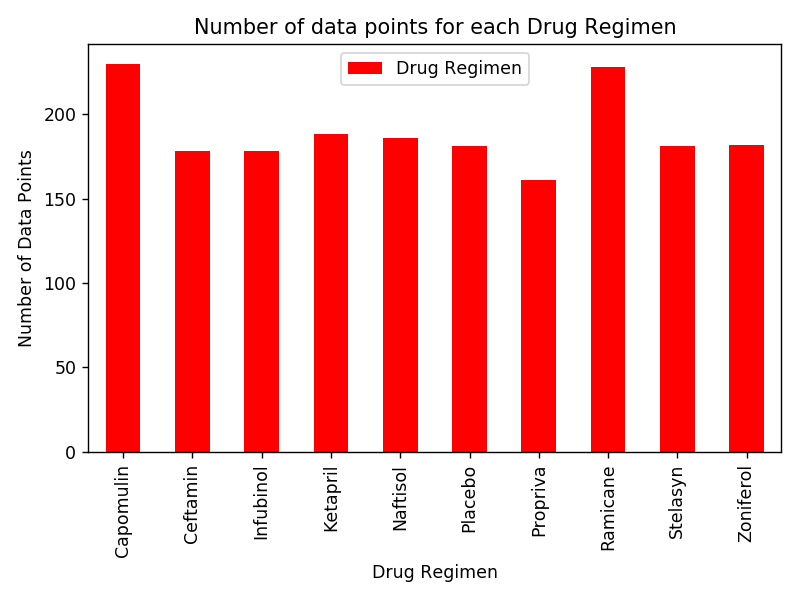

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# create a dataframe grouping by the 'Drug Regimen' column
drug_regimen_df = study_data_df.groupby('Drug Regimen')

# Create a dataframe for counts of data
drug_regimen_count = pd.DataFrame(drug_regimen_df['Drug Regimen'].count())


# Create a bar chart variable so I don't have to type so much
count_chart = drug_regimen_count.plot(kind='bar', title="Number of data points for each Drug Regimen", color="red")

# Set the x and y labels
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Data Points")
plt.tight_layout()
# Save the figure
plt.savefig("PandaBarChart.png")

plt.show()

<IPython.core.display.Javascript object>


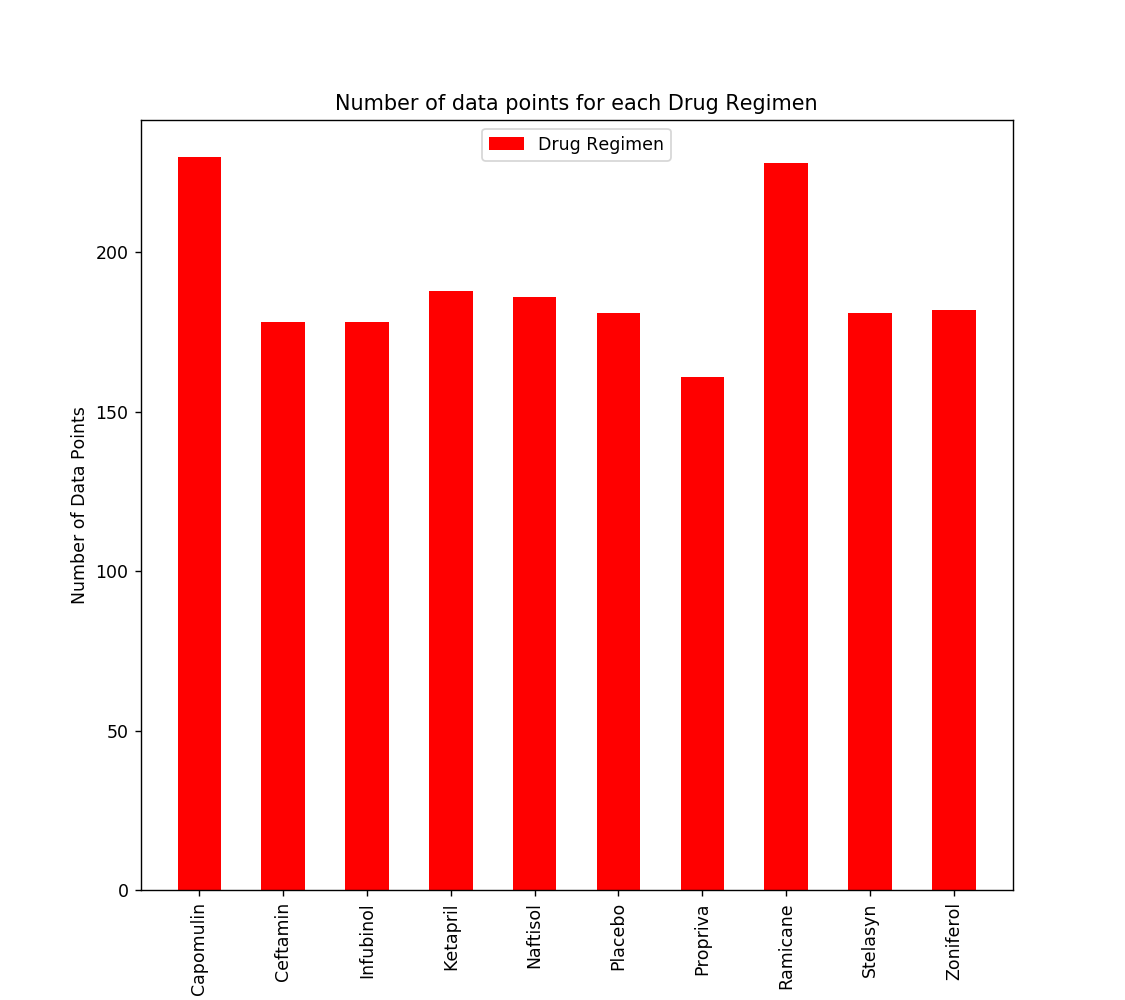

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_regimen_count["Drug Regimen"], color='red', align= "center", width = 0.52)
plt.xticks(tick_locations, list(drug_regimen_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_regimen_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Number of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="upper center")

# Save the figure
plt.savefig("PyplotBarChart.png")
plt.show()


## Pie plots

<IPython.core.display.Javascript object>


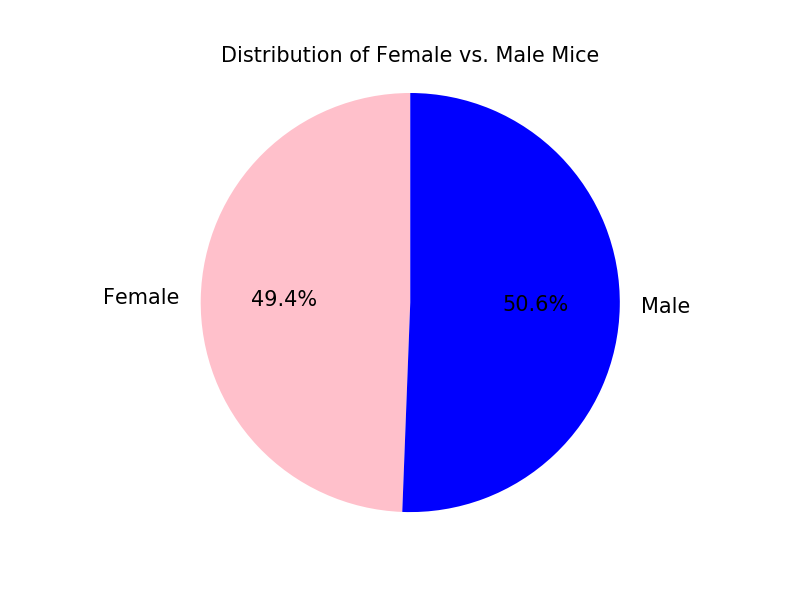

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#make a dataframe for this data
gender_df = study_data_df.groupby('Sex')
gender_count_df = pd.DataFrame(gender_df['Sex'].count())

gender_count_df


#pandas pie chart
gender_count_df.plot(kind='pie', y = 'Sex', \
                        title="Distribution of Female vs. Male Mice",startangle=90, \
                        autopct='%1.1f%%', fontsize=12, colors =["pink","blue"],legend =False,)

#reshape to make it pretty
plt.axis("equal")
plt.ylabel("")

#save the plot
plt.savefig("PandaPieChart.png")
plt.show()

<IPython.core.display.Javascript object>


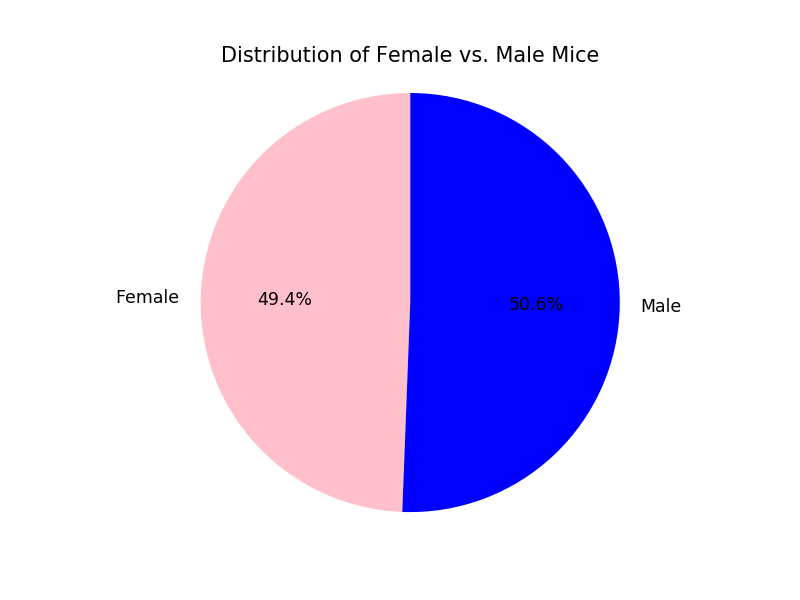

(-1.105172849624489,
 1.1027130801595115,
 -1.1045613723658971,
 1.1002172082078998)

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#set up the data needed
gender_count = (study_data_df.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Female", "Male"]
colors = ["pink", "blue"]


#make the pie chart
plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=90)

#format to make it pretty
plt.title("Distribution of Female vs. Male Mice", loc='center', pad=None)

plt.axis("equal")

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_df = study_data_df.loc[study_data_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = study_data_df.loc[study_data_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = study_data_df.loc[study_data_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = study_data_df.loc[study_data_df["Drug Regimen"] == "Ceftamin", :]
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [14]:
cap_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_last_vol = pd.DataFrame(cap_last)
cap_last_merge = pd.merge(cap_last_vol, study_data_df, on=("Mouse ID","Timepoint"),how="left")
cap_last_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers
# treatments - Capomulin, Ramicane, Infubinol, and Ceftamin

tumors = cap_last_merge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [16]:

ram_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_last_vol = pd.DataFrame(ram_last)
ram_last_merge = pd.merge(ram_last_vol, study_data_df, on=("Mouse ID","Timepoint"),how="left")
ram_last_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [17]:
#Ramicane
tumors2 = ram_last_merge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [20]:
#Infubinol
inf_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_last_vol = pd.DataFrame(inf_last)
inf_last_merge = pd.merge(inf_last_vol, study_data_df, on=("Mouse ID","Timepoint"),how="left")
inf_last_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [21]:
                        
#Infubinol
tumors3 = inf_last_merge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [23]:

ceft_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceft_last_vol = pd.DataFrame(ceft_last)
ceft_last_merge = pd.merge(ceft_last_vol, study_data_df, on=("Mouse ID","Timepoint"),how="left")
ceft_last_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [24]:
#Ceftamin
tumors4 = ceft_last_merge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


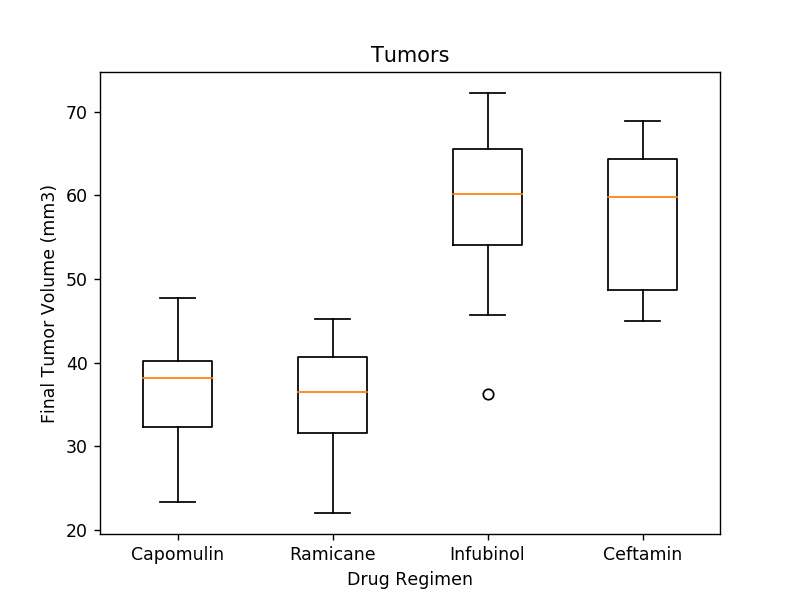

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


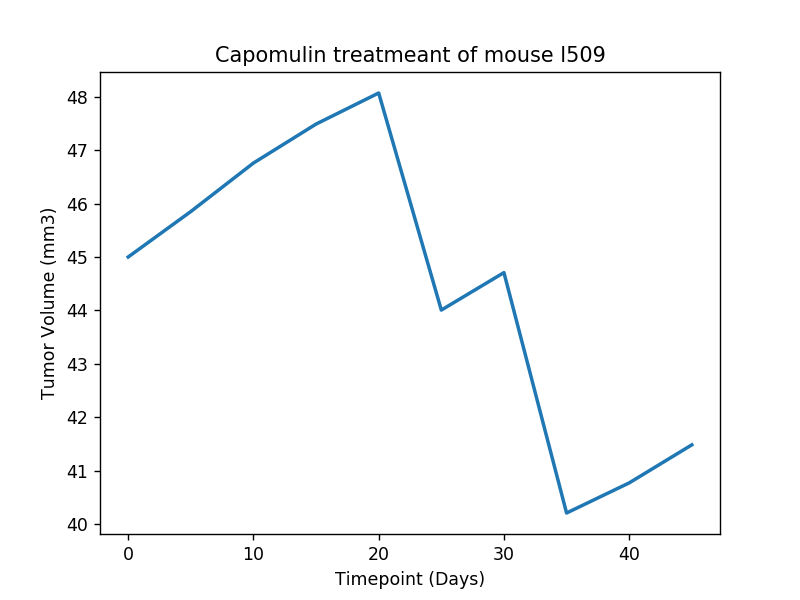

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

<IPython.core.display.Javascript object>


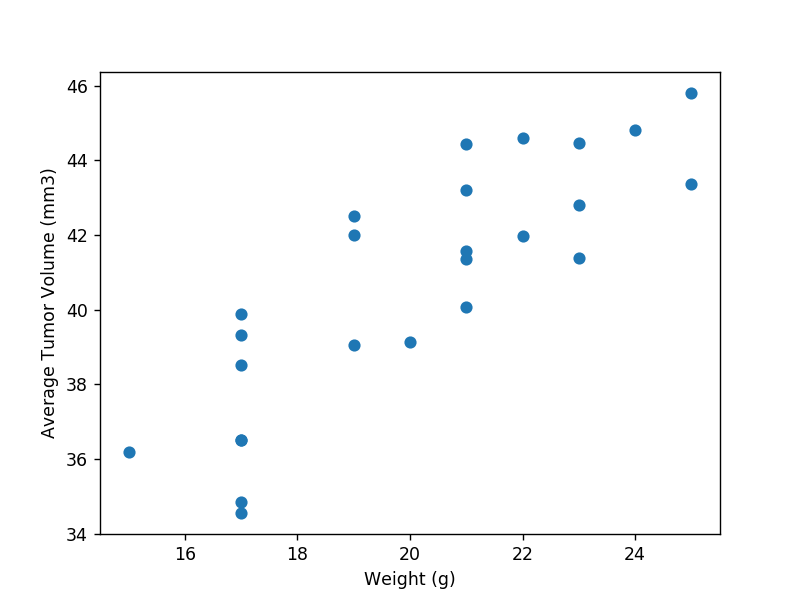

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_avg = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
model

The correlation between mouse weight and average tumor volume is 0.84


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

<IPython.core.display.Javascript object>


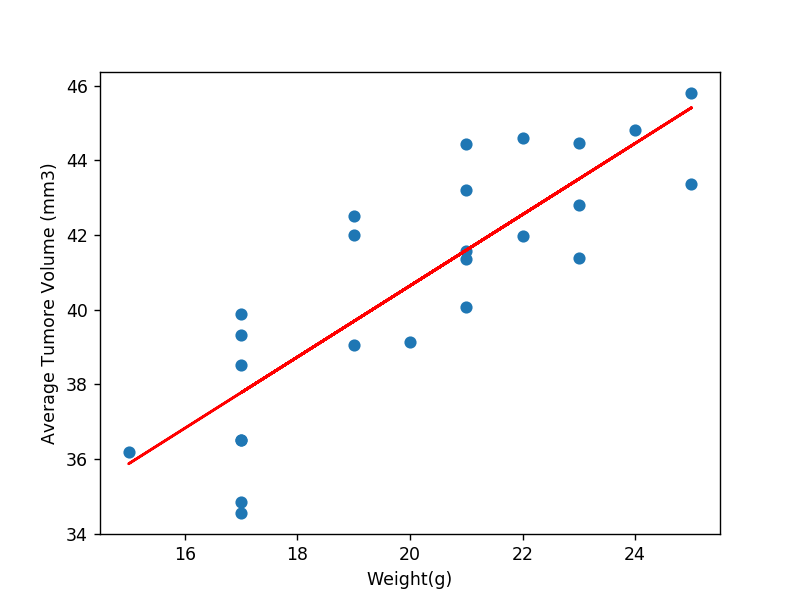

In [31]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = cap_avg['Weight (g)']*mslope+bintercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()